# Housing sale prices in King County, USA between the time period May 2014 - May 2015.

###### Firstly, I will go through a thorough data exploration to identify most important features and to explore the intercorrelation between features. After that I apply data normalization between varialbes and conduct feature engineering, Finally, I will be applying different machine learning algorithms and evaluating their respective success to a cross-validated splitted train-test set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('C:\\Users\\abroc\\Downloads\\House_King\\HOUSE_KING\\kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape

(21613, 21)

In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

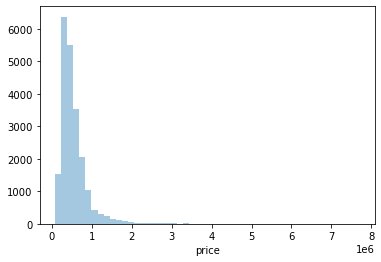

In [8]:
#histogram
sns.distplot(data['price'], bins=50, kde=False);

In [9]:
print("Skewness of price is:",data['price'].skew())
print("Kurtosis of price is:",data['price'].kurt())

Skewness of price is: 4.024069144684712
Kurtosis of price is: 34.58554043194243


# Feature exploration

in this section we will analyse the relationship between price and other variables

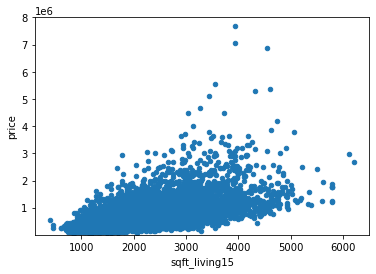

In [10]:
var = 'sqft_living15'
data_var = pd.concat([data['price'], data[var]], axis=1)
data_var.plot.scatter(x=var, y='price', ylim=(3,8000000));

From above the scatter plot we can conlude that the relation of price and sqft_living15 is in linear relationship and have some outliers.

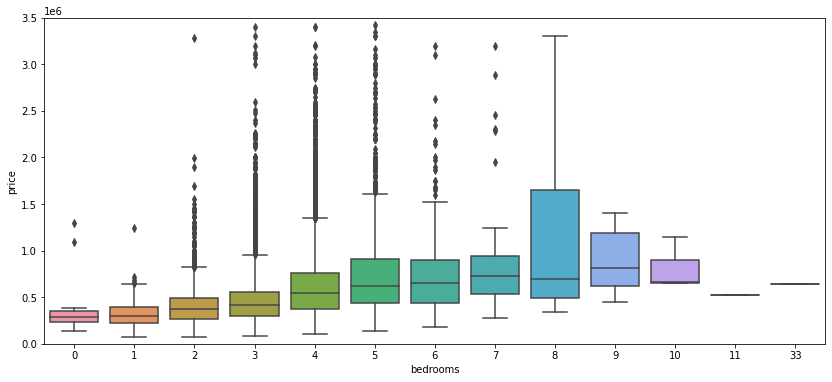

In [11]:
var = 'bedrooms'
data2 = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data2)
fig.axis(ymin=0, ymax=3500000);

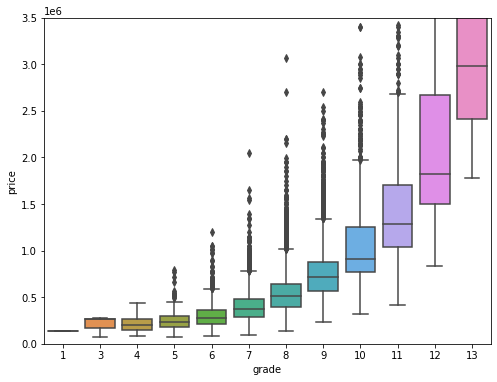

In [12]:
var = 'grade'
data3 = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data3)
fig.axis(ymin=0, ymax=3500000);

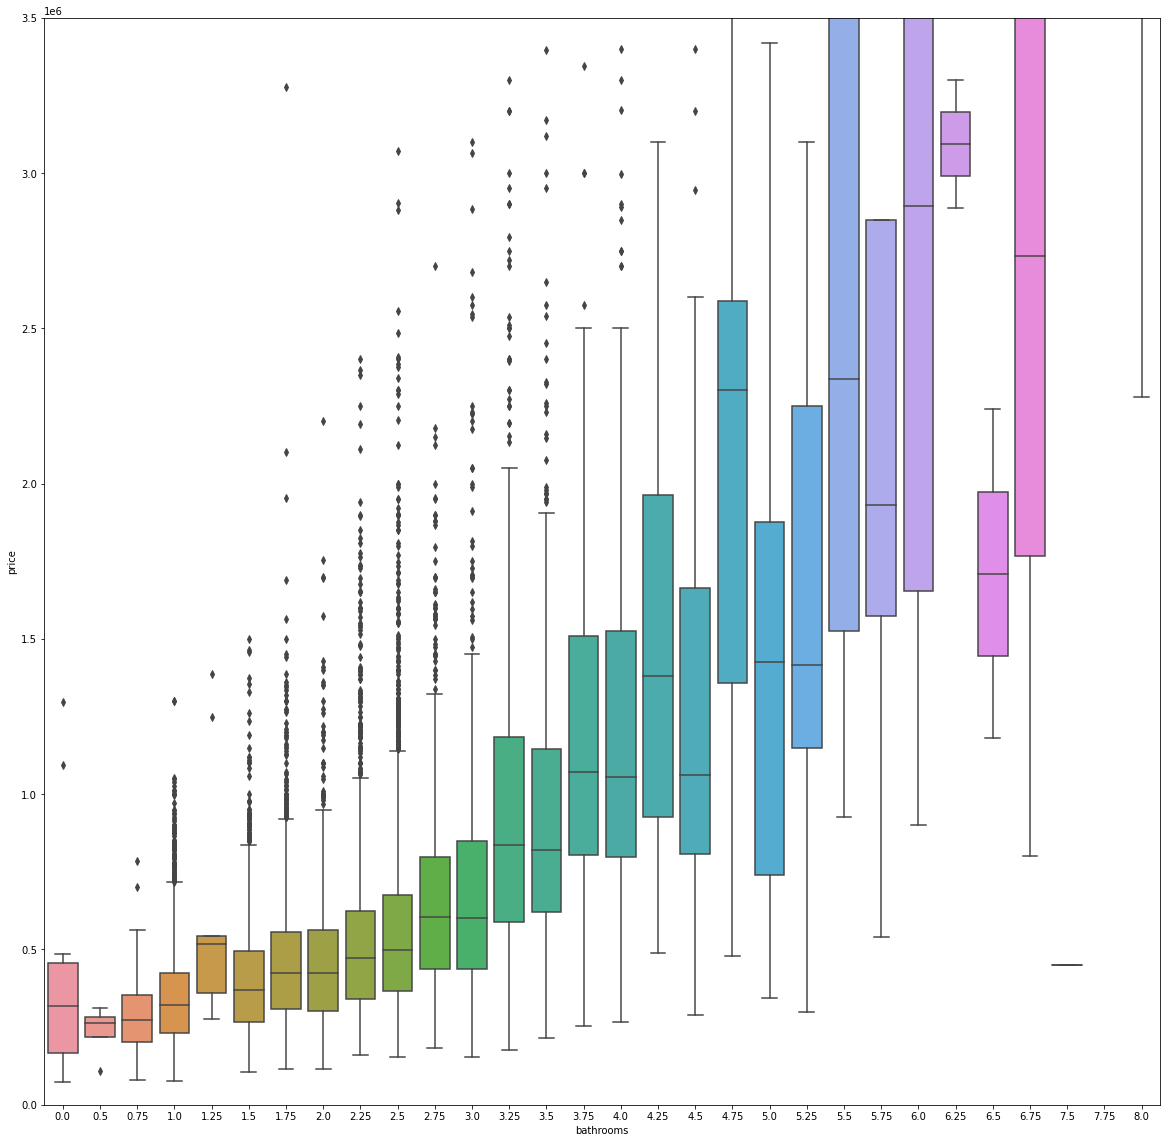

In [13]:
var = 'bathrooms'
data4 = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="price", data=data4)
fig.axis(ymin=0, ymax=3500000);

From above all boxplot we can clearly analyse that when number of bathrooms,grade and bedrooms increases then price also increases. This is most evident in case of the features bathrooms and grade.

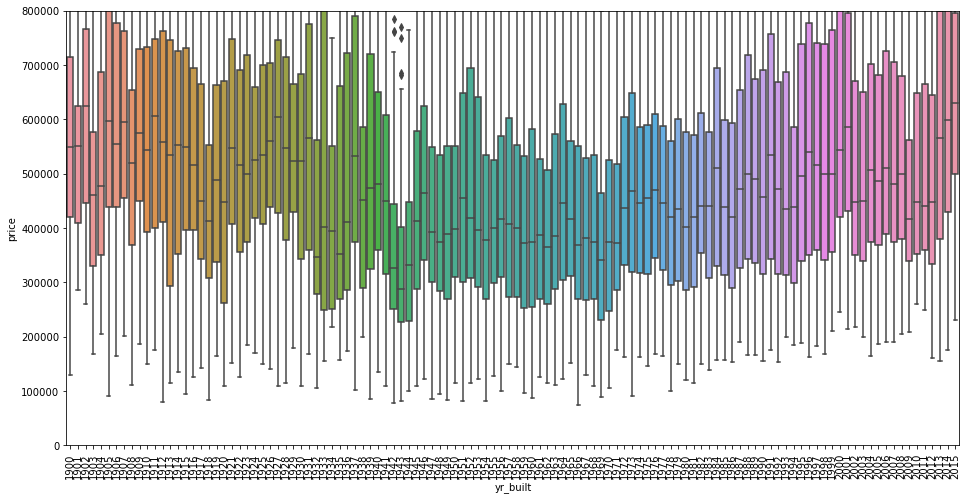

In [14]:
var = 'yr_built'
data5 = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data5)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

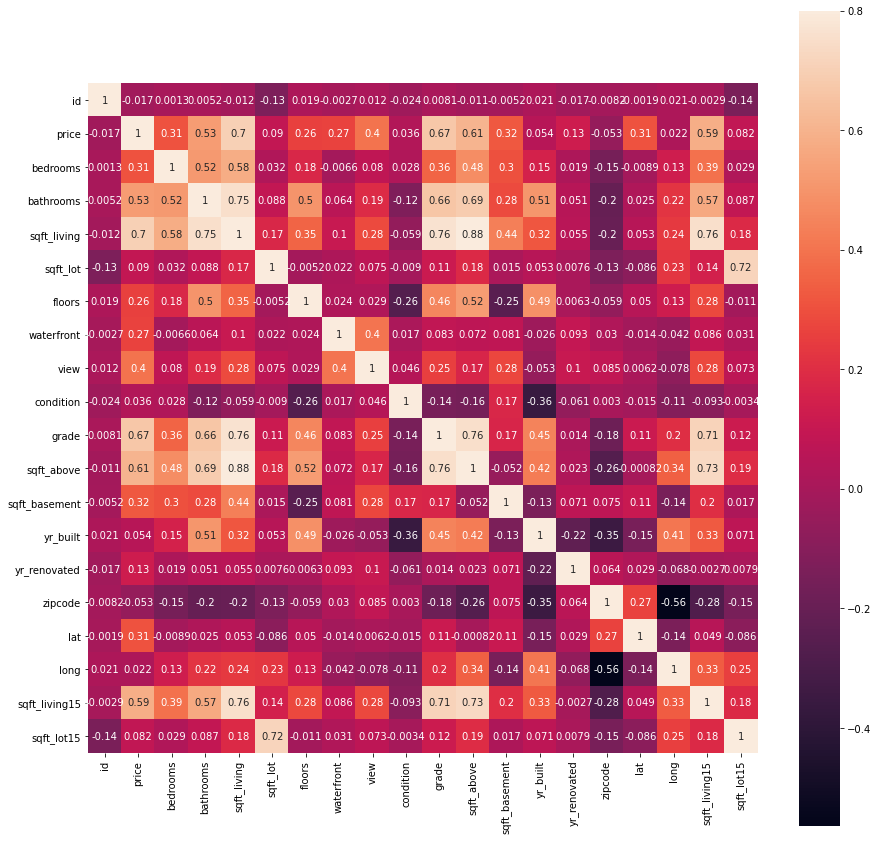

In [15]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

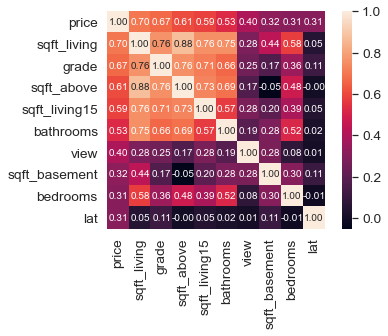

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

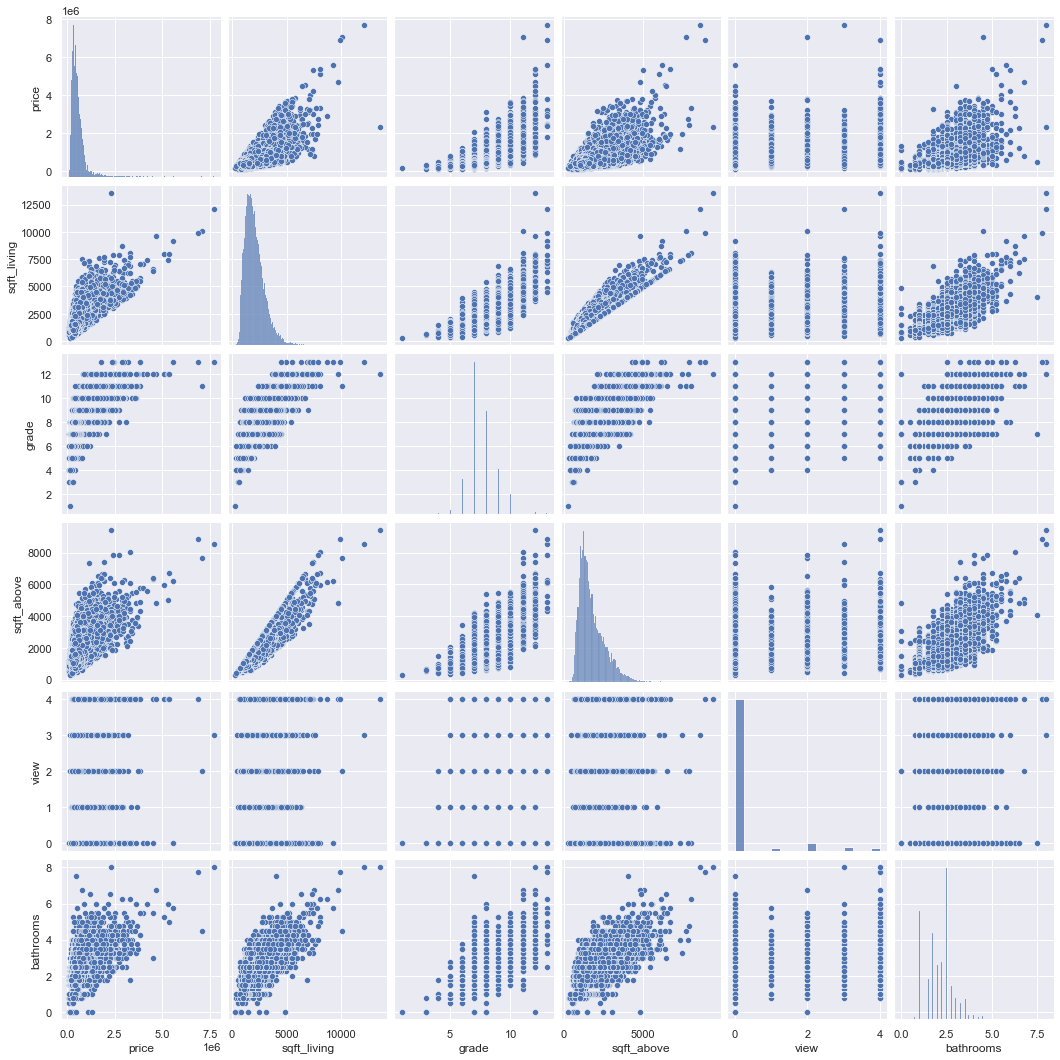

In [17]:
#scatterplot
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms']
sns.pairplot(data[cols], size = 2.5)
plt.show()

##### These overall scatterplots confirm the findings of the heatmap. There is myriad of linear correlation between sqft_living, sqft_above, bathrooms and grade. This yields an opportunity for to combine features. Moreover, what we learned that the above mentioned features have the biggest impact on sale price. One would also expect location to play a role, but as they are in latitude/longitude coordinates, it requires advanced data manipulation to take it into account. Finally, due to many linear relationships we can apply regression models

In [18]:
#standardizing data to mitigate skewness and kurtosis
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(data['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.26686039]
 [-1.25868864]
 [-1.25324081]
 [-1.2505169 ]
 [-1.24779298]
 [-1.24643103]
 [-1.24506907]
 [-1.24234515]
 [-1.23962124]
 [-1.23962124]]

outer range (high) of the distribution:
[[10.75649871]
 [10.78646177]
 [11.24407943]
 [12.45022882]
 [12.96559346]
 [13.10178919]
 [13.70105041]
 [17.28299812]
 [17.76649297]
 [19.50298853]]


#### Let's normalise the Saleprice and sqft_living feature

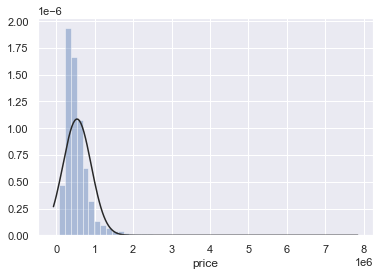

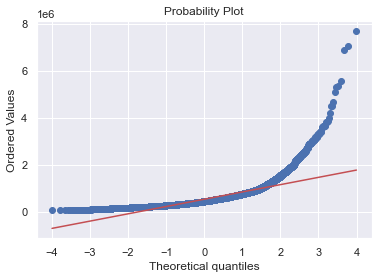

In [19]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(data['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

### We'll fix it by taking the log and fitting the plot to a normal distribution curve

In [20]:
#applying log transformation
data['price'] = np.log(data['price'])

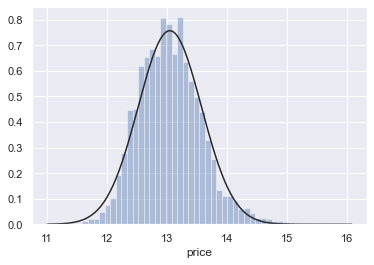

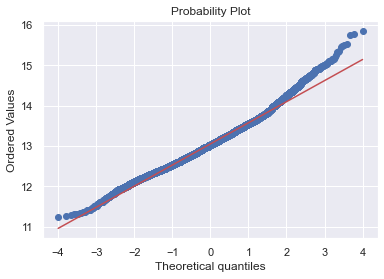

In [21]:
#transformed histogram and normal probability plot
sns.distplot(data['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

#### Done! Now for sqft_living

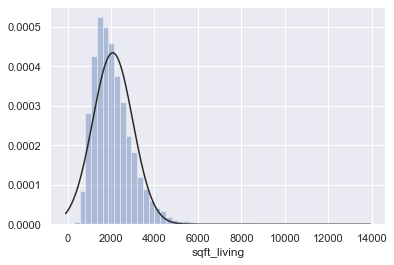

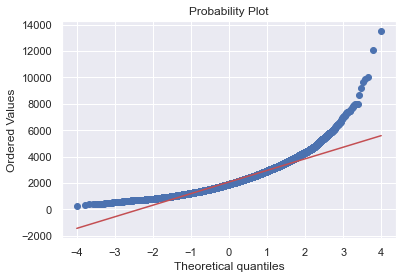

In [22]:
#histogram and normal probability plot
sns.distplot(data['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living'], plot=plt)

In [23]:
#data transformation
data['sqft_living'] = np.log(data['sqft_living'])

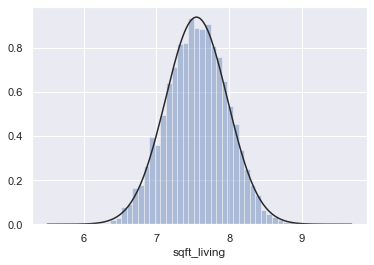

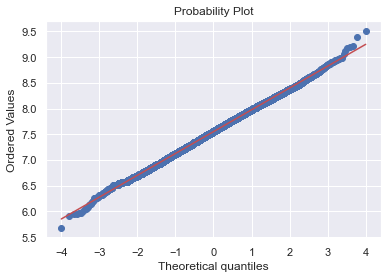

In [24]:
#transformed histogram and normal probability plot
sns.distplot(data['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living'], plot=plt)

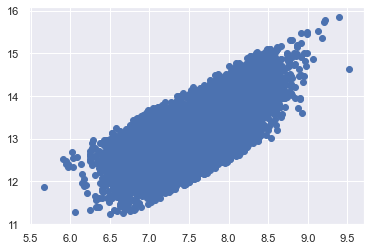

In [25]:
#scatter plot
plt.scatter(data['sqft_living'], data['price']);

#### Now there is a nice linear relationship between the features

### Fitting Machine Learning Models

In [26]:
Y = data.price.values

In [27]:
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','view', 'condition', 'grade', 'sqft_above',
                'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15']
X=data[feature_cols]

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, random_state=9)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [39]:
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 78%'